<a href="https://colab.research.google.com/github/tcantalice/pos-ds_ia-processamento-dados/blob/main/Aula_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir /root/.kaggle
!cp ./drive/MyDrive/DataScience/kaggle.json /root/.kaggle
!kaggle d download martj42/womens-international-football-results
!unzip womens-international-football-results.zip

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 40.4MB/s]
Archive:  womens-international-football-results.zip
  inflating: results.csv             
  inflating: shootouts.csv           


In [7]:
import pandas as pd

In [8]:
DATASET_FILE = 'results.csv'

df = pd.read_csv(DATASET_FILE)

In [9]:
df.shape

(4884, 9)

In [10]:
df.describe()

,home_score,away_score
count,4884.000000,4884.000000
mean,2.272727,1.431409
std,2.736377,1.974651
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,3.000000,2.000000
max,24.000000,24.000000


In [11]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [12]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


In [13]:
df['country'].unique()

array(['Italy', 'Hong Kong', 'Taiwan', 'India', 'Finland', 'Norway',
       'Northern Ireland', 'Iceland', 'England', 'Scotland', 'Belgium',
       'Sweden', 'Switzerland', 'Netherlands', 'France', 'Denmark',
       'Republic of Ireland', 'Portugal', 'Germany', 'Thailand',
       'New Caledonia', 'Hungary', 'Spain', 'New Zealand', 'Bulgaria',
       'Czechoslovakia', 'Australia', 'Poland', 'Nigeria', 'Ghana',
       'Haiti', 'Brazil', 'Guinea', 'Japan', 'Cameroon', 'Russia',
       'Greece', 'China PR', 'Romania', 'United States', 'Lithuania',
       'Ukraine', 'Wales', 'Latvia', 'Slovenia', 'Slovakia', 'Malaysia',
       'Croatia', 'Czech Republic', 'Canada', 'Papua New Guinea',
       'South Africa', 'Sierra Leone', 'Zambia', 'Angola', 'Austria',
       'Faroe Islands', 'FR Yugoslavia', 'Belarus', 'Estonia', 'Turkey',
       'Argentina', 'Mozambique', 'Egypt', 'Uganda', 'Eswatini',
       'Lesotho', 'Guatemala', 'Trinidad and Tobago',
       'Bosnia and Herzegovina', 'Israel', 'Phili

In [14]:
df.loc[df['country'] == 'Brazil'].head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
381,1991-04-28,Brazil,Chile,6,1,Copa América,Maringá,Brazil,False
383,1991-05-01,Chile,Venezuela,1,0,Copa América,Maringá,Brazil,True
385,1991-05-05,Brazil,Venezuela,6,11,Copa América,Maringá,Brazil,False
639,1995-01-08,Brazil,Ecuador,13,0,Copa América,Uberlândia,Brazil,False
640,1995-01-08,Chile,Bolivia,11,0,Copa América,Uberlândia,Brazil,True


In [15]:
df[(df['country'] == 'Brazil') & (df['city'] == 'São Paulo')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3706,2016-08-03,Canada,Australia,2,0,Olympic Games,São Paulo,Brazil,True
3707,2016-08-03,Zimbabwe,Germany,1,6,Olympic Games,São Paulo,Brazil,True
3712,2016-08-06,Canada,Zimbabwe,3,1,Olympic Games,São Paulo,Brazil,True
3713,2016-08-06,Germany,Australia,2,2,Olympic Games,São Paulo,Brazil,True
3724,2016-08-12,Canada,France,1,0,Olympic Games,São Paulo,Brazil,True
3728,2016-08-19,Brazil,Canada,1,2,Olympic Games,São Paulo,Brazil,False


In [16]:
df['date'].str.slice(0, 4).unique()

array(['1969', '1975', '1977', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [17]:
df[(df['country'] == 'Italy') & (df['date'].str.slice(0, 4) == '2015')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3487,2015-09-18,Italy,Georgia,6,1,UEFA Euro qualification,La Spezia,Italy,False
3513,2015-10-24,Italy,Switzerland,0,3,UEFA Euro qualification,Cesena,Italy,False


In [18]:
df[df['country'] == 'Brazil']['country'].count()

44

In [19]:
# Quantidade de registros com valor único nessa coluna
df[df['country'] == 'Brazil']['country'].nunique()

1

In [57]:
df.groupby('country')['country'].count().sort_values(ascending=False).head(10)

country
Portugal         593
United States    304
Cyprus           262
China PR         225
France           115
Sweden           113
Germany          110
Canada            92
Netherlands       85
Italy             83
Name: country, dtype: int64

In [58]:
df.sort_values(by=['home_score', 'away_score'], ascending=[False, True])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1344,2001-12-06,North Korea,Singapore,24,0,AFC Championship,New Taipei City,Taiwan,True
712,1995-09-24,China PR,Philippines,21,0,AFC Championship,Kota Kinabalu,Malaysia,True
904,1997-12-05,Japan,Guam,21,0,AFC Championship,Guangdong,China PR,True
984,1998-08-28,Canada,Puerto Rico,21,0,CONCACAF Championship,Toronto,Canada,False
1019,1998-12-09,New Zealand,Samoa,21,0,OFC Championship,Auckland,New Zealand,False
...,...,...,...,...,...,...,...,...,...
1566,2003-06-12,Thailand,North Korea,0,14,AFC Championship,Bangkok,Thailand,False
2844,2012-01-21,Dominican Republic,United States,0,14,Olympic Games qualification,Vancouver,Canada,True
1513,2003-04-07,Samoa,New Zealand,0,15,OFC Championship,Canberra,Australia,True
4734,2021-09-23,Maldives,Vietnam,0,16,AFC Asian Cup qualification,Dushanbe,Tajikistan,True


In [62]:
df.set_index('date')

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
date,,,,,,,,
1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
1969-11-02,England,France,2,0,Euro,Turin,Italy,True
1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True
...,...,...,...,...,...,...,...,...
2022-07-22,Sweden,Belgium,1,0,UEFA Euro,Leigh,Sweden,True
2022-07-23,France,Netherlands,1,0,UEFA Euro,Rotherham,France,True
2022-07-26,England,Sweden,4,0,UEFA Euro,Sheffield,England,False


In [20]:
filter_brazil_home = df['home_team'] == 'Brazil'
filter_brazil_away = df['away_team'] == 'Brazil'

In [21]:
filter_home_won = df['home_score'] > df['away_score']
filter_away_won = df['away_score'] > df['home_score']

In [25]:
filter_home_defeated = df['home_score'] < df['away_score']
filter_away_defeated = df['away_score'] < df['home_score']

In [27]:
filter_tied = df['home_score'] == df['away_score']

In [22]:
# Total de gols já marcados pelo Brasil

df[filter_brazil_home]['home_score'].sum() + df[filter_brazil_away]['away_score'].sum()

403

In [29]:
# Total de vitórias do Brasil
brazil_wins = df[filter_brazil_home & filter_home_won].shape[0] + df[filter_brazil_away & filter_away_won].shape[0]

In [30]:
# Total de derrotas do Brasil
brazil_defeats = df[filter_brazil_home & filter_home_defeated].shape[0] + df[filter_brazil_away & filter_away_defeated].shape[0] 

In [31]:
# Total de empates
brazil_ties = df[(filter_brazil_home | filter_brazil_away) & filter_tied].shape[0]

In [35]:
brazil_total_games = df[filter_brazil_home | filter_brazil_away].shape[0]

In [36]:
# Taxa de vitórias do Brazil
brazil_wins / brazil_total_games

0.5797101449275363

In [37]:
# Taxa de derrotas
brazil_defeats / brazil_total_games

0.2826086956521739

In [39]:
# Jogando em casa, quantos gols o Brasil acumulou?
df[(df['home_team'] == 'Brazil') & (df['country'] == 'Brazil')]['home_score'].sum()

68

In [40]:
# Quantos gols o Brasil sofre jogando fora de casa?
df[filter_brazil_away]['home_score'].mean()

1.25

In [42]:
brazil_games = df[filter_brazil_home | filter_brazil_away]

In [51]:
brazil_games[filter_brazil_home].groupby(by='away_team')['date'].count().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


away_team
Argentina              6
United States          6
Australia              6
Japan                  5
Sweden                 5
Venezuela              5
Colombia               4
Germany                4
Norway                 4
Ecuador                3
Chile                  3
Bolivia                2
China PR               2
Canada                 2
South Korea            2
Paraguay               2
Russia                 1
Uruguay                1
Trinidad and Tobago    1
Switzerland            1
Spain                  1
South Africa           1
North Korea            1
Peru                   1
Costa Rica             1
Nigeria                1
New Zealand            1
Mexico                 1
Jamaica                1
Italy                  1
Finland                1
Denmark                1
Netherlands            1
Name: date, dtype: int64

In [54]:
brazil_games[filter_brazil_away].groupby(by='home_team')['date'].count().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


home_team
United States        14
Germany               5
France                4
Sweden                3
Australia             3
China PR              3
Argentina             2
Norway                2
New Zealand           2
Japan                 2
Peru                  2
Chile                 2
Nigeria               1
Mexico                1
Portugal              1
Netherlands           1
Paraguay              1
Greece                1
Italy                 1
Great Britain         1
Equatorial Guinea     1
England               1
Costa Rica            1
Colombia              1
Canada                1
Cameroon              1
Bolivia               1
Uruguay               1
Name: date, dtype: int64

# Amostragem

In [67]:
df.sample(frac=.2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
495,1992-11-14,Germany,Russia,0,0,UEFA Euro qualification,Rheine,Germany,False
4066,2018-03-07,United States,England,1,0,SheBelieves Cup,Orlando,United States,False
2835,2011-12-20,Israel,Scotland,1,6,UEFA Euro qualification,Ness Ziona,Israel,False
226,1987-10-18,Belgium,Czechoslovakia,1,1,UEFA Euro qualification,Aalst,Belgium,False
3104,2013-03-08,New Zealand,Italy,2,0,Cyprus Cup,Larnaca,Cyprus,True
...,...,...,...,...,...,...,...,...,...
2653,2010-11-17,Brazil,Argentina,4,0,Copa América,Latacunga,Ecuador,True
3190,2013-10-28,United States,New Zealand,4,1,Friendly,San Francisco,United States,False
4132,2018-04-09,Jordan,Thailand,1,6,AFC Asian Cup,Amman,Jordan,False
3745,2016-09-19,United States,Netherlands,3,1,Friendly,Atlanta,United States,False


In [68]:
df.sample(frac=.2, random_state=1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
3732,2016-09-15,Romania,Ukraine,2,1,UEFA Euro qualification,Cluj-Napoca,Romania,False
1242,2000-07-03,United States,Brazil,1,0,CONCACAF Gold Cup,Massachusetts,United States,False
3072,2012-11-11,Equatorial Guinea,South Africa,4,0,African Championship,Malabo,Equatorial Guinea,False
804,1996-05-12,Sweden,Spain,1,1,UEFA Euro qualification,Visby,Sweden,False
3319,2014-10-15,Ghana,South Africa,1,1,African Championship,Windhoek,Namibia,True
...,...,...,...,...,...,...,...,...,...
1621,2003-09-27,France,Brazil,1,1,FIFA World Cup,"Washington, D.C.",United States,True
58,1981-06-07,Hong Kong,Philippines,2,0,AFC Championship,Hong Kong,Hong Kong,False
4811,2022-02-03,China PR,Japan,2,2,AFC Asian Cup,Pune,India,True
3927,2017-07-24,Norway,Denmark,0,1,UEFA Euro,Deventer,Netherlands,True


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

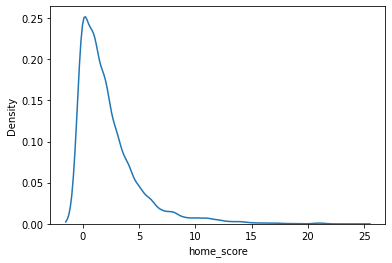

In [70]:
sns.kdeplot(df['home_score'])

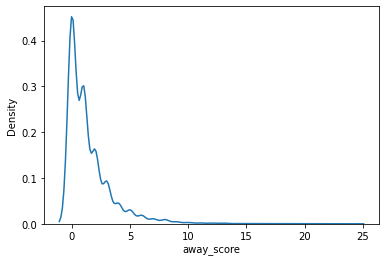

In [71]:
sns.kdeplot(df['away_score'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

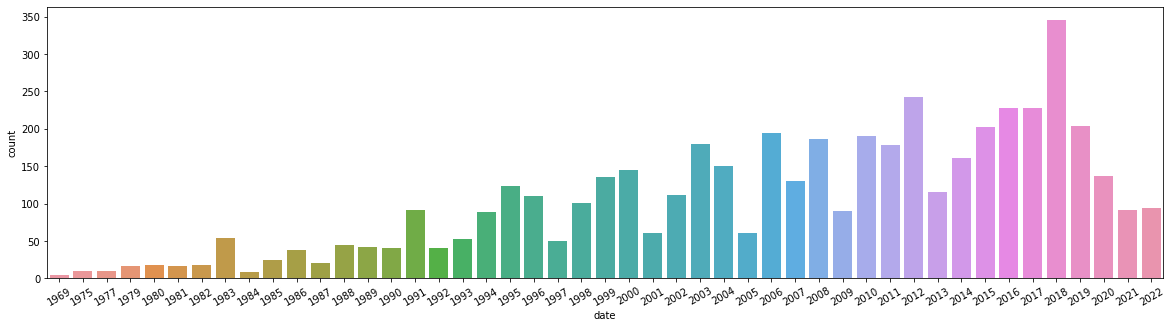

In [77]:
plt.figure(figsize=(20, 5))
sns.countplot(x=df['date'].str.slice(0, 4), data=df)
plt.xticks(rotation=30)

# Mesclagem, juntação e concatenação

In [78]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']})
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']})
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']})

In [79]:
pd.concat([df2, df1, df3], axis=0)

,A,B,C,D
0,A4,B4,C4,D4
1,A5,B5,C5,D5
2,A6,B6,C6,D6
3,A7,B7,C7,D7
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
0,A8,B8,C8,D8
1,A9,B9,C9,D9


In [80]:
df4 = pd.DataFrame({'E': ['E0', 'E1', 'E2', 'E3'],
                    'F': ['F0', 'F1', 'F2', 'F3'],
                    'G': ['G0', 'G1', 'G2', 'G3'],
                    'H': ['H0', 'H1', 'H2', 'H3']})

In [81]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,E,F,G,H
0,A0,B0,C0,D0,E0,F0,G0,H0
1,A1,B1,C1,D1,E1,F1,G1,H1
2,A2,B2,C2,D2,E2,F2,G2,H2
3,A3,B3,C3,D3,E3,F3,G3,H3


In [82]:
left = pd.DataFrame({'pk': [1, 2, 3, 4],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'fk': [1, 3, 4, 6],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [83]:
pd.merge(left, right, how='inner', left_on='pk', right_on='fk')

,pk,A,B,fk,C,D
0,1,A0,B0,1,C0,D0
1,3,A2,B2,3,C1,D1
2,4,A3,B3,4,C2,D2


In [84]:
pd.merge(left, right, how='outer', left_on='pk', right_on='fk')

,pk,A,B,fk,C,D
0,1.0,A0,B0,1.0,C0,D0
1,2.0,A1,B1,NaN,NaN,NaN
2,3.0,A2,B2,3.0,C1,D1
3,4.0,A3,B3,4.0,C2,D2
4,NaN,NaN,NaN,6.0,C3,D3


In [85]:
pd.merge(left, right, how='left', left_on='pk', right_on='fk')

,pk,A,B,fk,C,D
0,1,A0,B0,1.0,C0,D0
1,2,A1,B1,NaN,NaN,NaN
2,3,A2,B2,3.0,C1,D1
3,4,A3,B3,4.0,C2,D2


In [86]:
pd.merge(left, right, how='right', left_on='pk', right_on='fk')

,pk,A,B,fk,C,D
0,1.0,A0,B0,1,C0,D0
1,3.0,A2,B2,3,C1,D1
2,4.0,A3,B3,4,C2,D2
3,NaN,NaN,NaN,6,C3,D3
